#  Import Libraries

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#  Load Dataset

In [ ]:

train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.head())

Train shape: (8693, 14)
Test shape: (4277, 13)
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2     

#  Exploratory Data Analysis

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


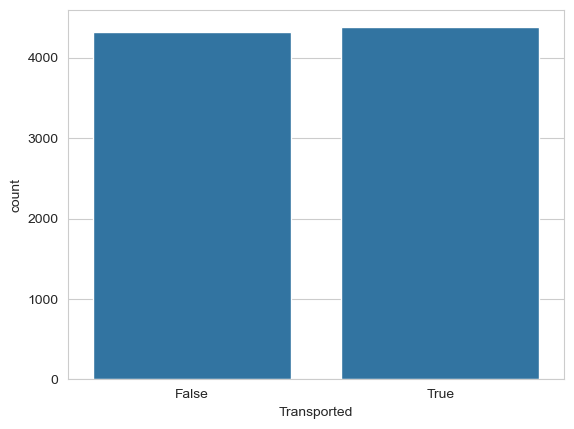

In [ ]:

print(train.isnull().sum())

sns.countplot(x="Transported", data=train)
plt.show()

#  Preprocessing

In [ ]:

num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in num_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(train[col].mean())

cat_cols = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])

train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

train, test = train.align(test, join='left', axis=1, fill_value=0)

C:\Users\user1\AppData\Local\Temp\ipykernel_2472\2191022107.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(train[col].mode()[0])
C:\Users\user1\AppData\Local\Temp\ipykernel_2472\2191022107.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(train[col].mode()[0])


#  Prepare Features and Target

In [ ]:

X = train.drop(['Transported','PassengerId','Name'], axis=1)
y = train['Transported'].astype(int)  

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Random Forest Classifier

In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#  Evaluate Model

In [ ]:

y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7883841288096607


#  submission

In [ ]:

X_test = test.drop(['PassengerId', 'Name'], axis=1, errors='ignore')
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


test_predictions = model.predict(X_test)


submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Transported": test_predictions.astype(bool)
})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully")

Submission file created successfully
